In [18]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Load + Read CSV
wine_data_load = "Data/winemag-data-130k-v2.csv"
wine_data_df = pd.read_csv(wine_data_load)

In [19]:
#Quick look inside CSV
wine_data_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [20]:
#Describte the points + price to determine ranges
#wine_data_df["points"].describe()
wine_data_df["price"].describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [21]:
#sorted_score_df = wine_data_df.sort_values("points",ascending=False)
#sorted_score_df.dropna()

In [22]:
price_points_df = pd.DataFrame().assign(Points=wine_data_df['points'], Price=wine_data_df['price'])
price_points_df.dropna().head()


,Points,Price
1,87,15.0
2,87,14.0
3,87,13.0
4,87,65.0
5,87,15.0


In [23]:
price_points_df.dropna()
price_points_df["Points"].astype('float')
price_points_df["Points"].describe()
#price_points_df.head()

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: Points, dtype: float64

In [34]:
#Calculate value score by wine

price_points_df.dropna()
price_points_df["Points"].astype('float')
value_score = price_points_df["Points"]/price_points_df["Price"]
#value_score.describe()
#price_points_df["Value Score"] = value_score
#price_points_df.head()

In [25]:
#Create new shortened data frame + assign value score
price_points_df = pd.DataFrame().assign(Title=wine_data_df['title'],Variety=wine_data_df['variety'],Points=wine_data_df['points'], Price=wine_data_df['price'])

value_score = (price_points_df["Price"]+price_points_df["Points"])/price_points_df["Price"]
price_points_df["Value Score"] = value_score
price_points_descending_df=price_points_df.sort_values("Value Score",ascending=False)
price_points_descending_df.dropna()

,Title,Variety,Points,Price,Value Score
64590,Bandit NV Merlot (California),Merlot,86,4.0,22.500000
126096,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Pinot Grigio,86,4.0,22.500000
20484,Dancing Coyote 2015 White (Clarksburg),White Blend,85,4.0,22.250000
1987,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,85,4.0,22.250000
110255,Bandit NV Merlot (California),Merlot,84,4.0,22.000000
...,...,...,...,...,...
113564,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,96,2000.0,1.048000
120391,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,91,2013.0,1.045206
98380,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,96,2500.0,1.038400
15840,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,96,2500.0,1.038400


In [26]:
price_points_ascending_df=price_points_df.sort_values("Value Score")
price_points_ascending_df.dropna()

,Title,Variety,Points,Price,Value Score
80290,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,88,3300.0,1.026667
98380,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,96,2500.0,1.038400
15840,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,96,2500.0,1.038400
120391,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,91,2013.0,1.045206
113564,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,96,2000.0,1.048000
...,...,...,...,...,...
112919,Terrenal 2010 Estate Bottled Tempranillo (Yecla),Tempranillo,84,4.0,22.000000
20484,Dancing Coyote 2015 White (Clarksburg),White Blend,85,4.0,22.250000
1987,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,85,4.0,22.250000
126096,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Pinot Grigio,86,4.0,22.500000


In [27]:
#Set Bins + Labels
price_bins = [0.0, 17.0, 25.0, 42.0, 100.0]
labels = ["Low Cost (<$17)","Medium Cost ($18-$25)","High Cost ($26-$42)","Splurge Cost ($43-$100)"]

In [28]:
#Create a copy of price points descending
per_price_point_summary = price_points_descending_df.copy()

In [29]:
#Best value low price
per_price_point_summary["Best Value (By Price)"] = pd.cut(price_points_descending_df["Price"],price_bins,labels=labels)
low_price_point_summary_df = per_price_point_summary.loc[per_price_point_summary["Best Value (By Price)"] == "Low Cost (<$17)", :]
low_price_point_summary_df.dropna().head(5)

,Title,Variety,Points,Price,Value Score,Best Value (By Price)
64590,Bandit NV Merlot (California),Merlot,86,4.0,22.50,Low Cost (<$17)
126096,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Pinot Grigio,86,4.0,22.50,Low Cost (<$17)
20484,Dancing Coyote 2015 White (Clarksburg),White Blend,85,4.0,22.25,Low Cost (<$17)
1987,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,85,4.0,22.25,Low Cost (<$17)
110255,Bandit NV Merlot (California),Merlot,84,4.0,22.00,Low Cost (<$17)


In [30]:
#Best value medium price
per_price_point_summary["Best Value (By Price)"] = pd.cut(price_points_descending_df["Price"],price_bins,labels=labels)
medium_price_point_summary_df = per_price_point_summary.loc[per_price_point_summary["Best Value (By Price)"] == "Medium Cost ($18-$25)", :]
medium_price_point_summary_df.dropna().head(5)


,Title,Variety,Points,Price,Value Score,Best Value (By Price)
123776,Michael David 2012 Petite Petit Petite Sirah (...,Petite Sirah,94,18.0,6.222222,Medium Cost ($18-$25)
39318,Domaine Cauhapé 2011 Symphonie de Novembre (J...,Petit Manseng,94,18.0,6.222222,Medium Cost ($18-$25)
6267,Stottle 2011 Lucille Late Harvest Viognier (Ya...,Viognier,94,18.0,6.222222,Medium Cost ($18-$25)
98438,Joseph Carr 2009 Dijon Clone Chardonnay (Sonom...,Chardonnay,94,18.0,6.222222,Medium Cost ($18-$25)
84597,David Hill 2013 Estate Riesling (Willamette Va...,Riesling,94,18.0,6.222222,Medium Cost ($18-$25)


In [31]:
#Best value high price
per_price_point_summary["Best Value (By Price)"] = pd.cut(price_points_descending_df["Price"],price_bins,labels=labels)
high_price_point_summary_df = per_price_point_summary.loc[per_price_point_summary["Best Value (By Price)"] == "High Cost ($26-$42)", :]
high_price_point_summary_df.dropna().head(5)

,Title,Variety,Points,Price,Value Score,Best Value (By Price)
101584,Melville 2008 Chardonnay (Sta. Rita Hills),Chardonnay,95,26.0,4.653846,High Cost ($26-$42)
9915,Domaine Zind-Humbrecht 2015 Goldert Grand Cru ...,Muscat,95,26.0,4.653846,High Cost ($26-$42)
19315,Russiz Superiore 2012 Sauvignon (Collio),Sauvignon,94,26.0,4.615385,High Cost ($26-$42)
46170,Domaine Michel Fonne 2012 Marckrain Grand Cru ...,Pinot Gris,94,26.0,4.615385,High Cost ($26-$42)
84832,Limerick Lane 2015 Grenache Rosé (Russian Rive...,Rosé,94,26.0,4.615385,High Cost ($26-$42)


In [32]:
#Best value splurge price
per_price_point_summary["Best Value (By Price)"] = pd.cut(price_points_descending_df["Price"],price_bins,labels=labels)
splurge_price_point_summary_df = per_price_point_summary.loc[per_price_point_summary["Best Value (By Price)"] == "Splurge Cost ($43-$100)", :]
splurge_price_point_summary_df.dropna().head(5)

,Title,Variety,Points,Price,Value Score,Best Value (By Price)
118059,Failla 2010 Estate Vineyard Chardonnay (Sonoma...,Chardonnay,99,44.0,3.250000,Splurge Cost ($43-$100)
99339,Domaine Sipp-Mack 2014 Osterberg Grand Cru Rie...,Riesling,95,43.0,3.209302,Splurge Cost ($43-$100)
63757,Chateau Dereszla 2009 Aszú 5 Puttonyos (Tokaji),White Blend,95,43.0,3.209302,Splurge Cost ($43-$100)
12964,Ryan Cochrane 2014 Solomon Hills Vineyard Pino...,Pinot Noir,94,43.0,3.186047,Splurge Cost ($43-$100)
69513,Quinta do Crasto 2009 Reserva Vinhas Velhas Re...,Portuguese Red,94,43.0,3.186047,Splurge Cost ($43-$100)


In [38]:
stacked_outputs_df = pd.concat([low_price_point_summary_df.iloc[:5],medium_price_point_summary_df.iloc[:5],high_price_point_summary_df.iloc[:5],splurge_price_point_summary_df.iloc[:5]],axis=0)
stacked_outputs_df.head(20)

,Title,Variety,Points,Price,Value Score,Best Value (By Price)
64590,Bandit NV Merlot (California),Merlot,86,4.0,22.500000,Low Cost (<$17)
126096,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Pinot Grigio,86,4.0,22.500000,Low Cost (<$17)
20484,Dancing Coyote 2015 White (Clarksburg),White Blend,85,4.0,22.250000,Low Cost (<$17)
1987,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,85,4.0,22.250000,Low Cost (<$17)
110255,Bandit NV Merlot (California),Merlot,84,4.0,22.000000,Low Cost (<$17)
123776,Michael David 2012 Petite Petit Petite Sirah (...,Petite Sirah,94,18.0,6.222222,Medium Cost ($18-$25)
39318,Domaine Cauhapé 2011 Symphonie de Novembre (J...,Petit Manseng,94,18.0,6.222222,Medium Cost ($18-$25)
6267,Stottle 2011 Lucille Late Harvest Viognier (Ya...,Viognier,94,18.0,6.222222,Medium Cost ($18-$25)
98438,Joseph Carr 2009 Dijon Clone Chardonnay (Sonom...,Chardonnay,94,18.0,6.222222,Medium Cost ($18-$25)
84597,David Hill 2013 Estate Riesling (Willamette Va...,Riesling,94,18.0,6.222222,Medium Cost ($18-$25)


In [47]:
stacked_outputs_df = pd.concat([low_price_point_summary_df.iloc[:5],medium_price_point_summary_df.iloc[:5],high_price_point_summary_df.iloc[:5],splurge_price_point_summary_df.iloc[:5]],axis=0)
stacked_outputs_df.head(20)


,Title,Variety,Points,Price,Value Score,Best Value (By Price)
64590,Bandit NV Merlot (California),Merlot,86,4.0,22.500000,Low Cost (<$17)
126096,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Pinot Grigio,86,4.0,22.500000,Low Cost (<$17)
20484,Dancing Coyote 2015 White (Clarksburg),White Blend,85,4.0,22.250000,Low Cost (<$17)
1987,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,85,4.0,22.250000,Low Cost (<$17)
110255,Bandit NV Merlot (California),Merlot,84,4.0,22.000000,Low Cost (<$17)
123776,Michael David 2012 Petite Petit Petite Sirah (...,Petite Sirah,94,18.0,6.222222,Medium Cost ($18-$25)
39318,Domaine Cauhapé 2011 Symphonie de Novembre (J...,Petit Manseng,94,18.0,6.222222,Medium Cost ($18-$25)
6267,Stottle 2011 Lucille Late Harvest Viognier (Ya...,Viognier,94,18.0,6.222222,Medium Cost ($18-$25)
98438,Joseph Carr 2009 Dijon Clone Chardonnay (Sonom...,Chardonnay,94,18.0,6.222222,Medium Cost ($18-$25)
84597,David Hill 2013 Estate Riesling (Willamette Va...,Riesling,94,18.0,6.222222,Medium Cost ($18-$25)


In [74]:
#Raw Data Frame For ScatterPlots
raw_data = {'title': ['Bandit NV Merlot (California)',
'Cramele Recas 2011 UnWineD Pinot Grigio (Viile...',
'Dancing Coyote 2015 White (Clarksburg)',
'Felix Solis 2013 Flirty Bird Syrah (Vino de la...',
'Bandit NV Merlot (California)',
'Michael David 2012 Petite Petit Petite Sirah (...',
'Domaine Cauhapé 2011 Symphonie de Novembre (J...',
'Stottle 2011 Lucille Late Harvest Viognier (Ya...',
'Joseph Carr 2009 Dijon Clone Chardonnay (Sonom...',
'David Hill 2013 Estate Riesling (Willamette Va...',
'Melville 2008 Chardonnay (Sta. Rita Hills)',
'Domaine Zind-Humbrecht 2015 Goldert Grand Cru ...',
'Russiz Superiore 2012 Sauvignon (Collio)',
'Domaine Michel Fonne 2012 Marckrain Grand Cru ...',
'Limerick Lane 2015 Grenache Rosé (Russian Rive...',
'Failla 2010 Estate Vineyard Chardonnay (Sonoma...',
'Domaine Sipp-Mack 2014 Osterberg Grand Cru Rie...',
'Chateau Dereszla 2009 Aszú 5 Puttonyos (Tokaji)',
'Ryan Cochrane 2014 Solomon Hills Vineyard Pino...',
'Quinta do Crasto 2009 Reserva Vinhas Velhas Re...'], 
        'variety': ['Merlot','Pinot Grigio','White Blend','Syrah','Merlot','Petite Sirah','Petit Manseng','Viognier','Chardonnay','Riesling','Chardonnay','Muscat','Sauvignon','Pinot Gris','Rosé','Chardonnay','Riesling','White Blend','Pinot Noir','Portuguese Red'], 
        'points': [86,86,85,85,84,94,94,94,94,94,95,95,94,94,94,99,95,95,94,94],
        'price': [4,4,4,4,4,18,18,18,18,18,26,26,26,26,26,44,43,43,43,43], 
        'value_score': [22.5,22.5,22.3,22.3,22,6.2,6.2,6.2,6.2,6.2,4.7,4.7,4.6,4.6,4.6,3.3,3.2,3.2,3.1,3.1],
        'best_value_by_price': ['Low Cost (<$17)','Low Cost (<$17)','Low Cost (<$17)','Low Cost (<$17)','Low Cost (<$17)','Medium Cost ($18-$25)','Medium Cost ($18-$25)','Medium Cost ($18-$25)','Medium Cost ($18-$25)','Medium Cost ($18-$25)','High Cost ($26-$42)','High Cost ($26-$42)','High Cost ($26-$42)','High Cost ($26-$42)','High Cost ($26-$42)','Splurge Cost ($43-$100)','Splurge Cost ($43-$100)','Splurge Cost ($43-$100)','Splurge Cost ($43-$100)','Splurge Cost ($43-$100)']}
df = pd.DataFrame(raw_data, columns = ['title', 'variety', 'points', 'price', 'value_score', 'best_value_by_price'])
df

,title,variety,points,price,value_score,best_value_by_price
0,Bandit NV Merlot (California),Merlot,86,4,22.5,Low Cost (<$17)
1,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Pinot Grigio,86,4,22.5,Low Cost (<$17)
2,Dancing Coyote 2015 White (Clarksburg),White Blend,85,4,22.3,Low Cost (<$17)
3,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,85,4,22.3,Low Cost (<$17)
4,Bandit NV Merlot (California),Merlot,84,4,22.0,Low Cost (<$17)
5,Michael David 2012 Petite Petit Petite Sirah (...,Petite Sirah,94,18,6.2,Medium Cost ($18-$25)
6,Domaine Cauhapé 2011 Symphonie de Novembre (J...,Petit Manseng,94,18,6.2,Medium Cost ($18-$25)
7,Stottle 2011 Lucille Late Harvest Viognier (Ya...,Viognier,94,18,6.2,Medium Cost ($18-$25)
8,Joseph Carr 2009 Dijon Clone Chardonnay (Sonom...,Chardonnay,94,18,6.2,Medium Cost ($18-$25)
9,David Hill 2013 Estate Riesling (Willamette Va...,Riesling,94,18,6.2,Medium Cost ($18-$25)


Text(0, 0.5, 'Points')

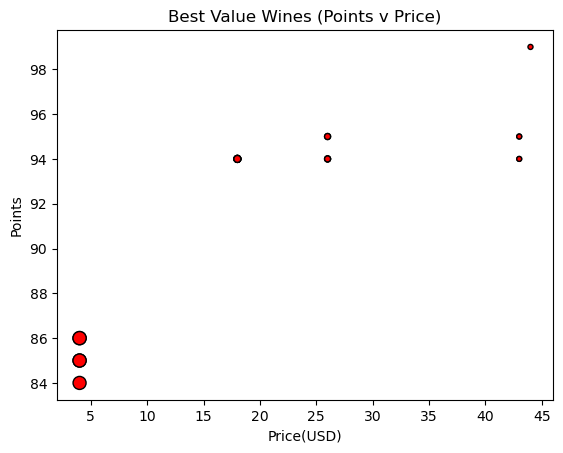

In [73]:

plt.scatter(df.price,df.points, s=df.value_score*4,marker="o",facecolors="red", edgecolors="black")
plt.title("Best Value Wines (Points v Price)")
plt.xlabel("Price(USD)")
plt.ylabel("Points")

Text(0, 0.5, 'Points')

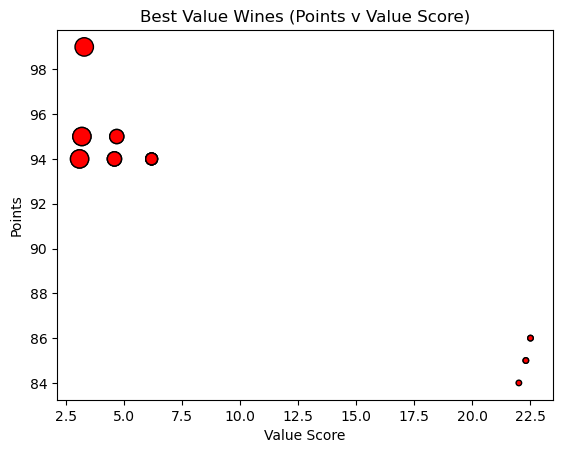

In [71]:

plt.scatter(df.value_score,df.points, s=df.price*4,marker="o",facecolors="red", edgecolors="black")
plt.title("Best Value Wines (Points v Value Score)")
plt.xlabel("Value Score")
plt.ylabel("Points")